<a href="https://colab.research.google.com/github/amiranissian/ai-ml-principles-exercises/blob/main/ML-training/cv-crash-course/Digit_classification_sklearn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn

In [2]:
import sklearn.datasets as datasets

In [148]:
data = datasets.load_digits()

In [149]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [150]:
data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [151]:
import numpy as np
from PIL import Image

3


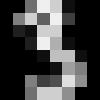

In [153]:
i = 3
print(data.target[i])
Image.fromarray((data.images[i] /16 * 255).astype(np.uint8), "L").resize((100, 100), resample= Image.NEAREST)

In [155]:
data.target[3]

3

In [156]:
data.images.reshape((len(data.images), -1)).shape



(1797, 64)

# Add some thing
* I did
* again

---
asdf



In [157]:
from sklearn.model_selection import train_test_split

In [158]:
flat_dataset = data.images.reshape((len(data.images),-1))
X_train, X_test, y_train, y_test = train_test_split(flat_dataset, data.target, train_size= 0.8)

In [159]:
X_train.shape

(1437, 64)

0


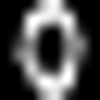

In [160]:
print(y_train[1])
Image.fromarray((X_train[1].reshape((8,8))/16 * 255).astype(np.uint8), "L").resize((100, 100))

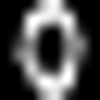

In [161]:
Image.fromarray((X_train[1].reshape((8,8))/16 * 255).astype(np.uint8), "L").resize((100, 100))

7


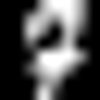

In [162]:
print(y_test[1])
Image.fromarray((X_test[1].reshape((8,8))/16 * 255).astype(np.uint8), "L").resize((100, 100))

In [163]:
from sklearn import svm



In [164]:
model = svm.SVC(gamma=0.001)
model.fit(X_train, y_train)

SVC(gamma=0.001)

In [165]:
# Predict the first ten samples from the test dataset
model.predict(X_test[0:10])

array([6, 7, 6, 2, 0, 6, 1, 7, 4, 8])

In [166]:
# Show the first ten ground truth values from the test dataset
y_test[0:10]

array([6, 7, 6, 2, 0, 6, 1, 7, 4, 8])

In [167]:
# Compare predicted and true
model.predict(X_test[0:10]) == y_test[0:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [168]:
from sklearn import metrics

predicted = model.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.97      1.00      0.99        38
           2       1.00      1.00      1.00        38
           3       0.97      1.00      0.98        31
           4       1.00      1.00      1.00        28
           5       1.00      0.98      0.99        51
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        33
           8       1.00      0.97      0.99        38
           9       0.97      0.97      0.97        39

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



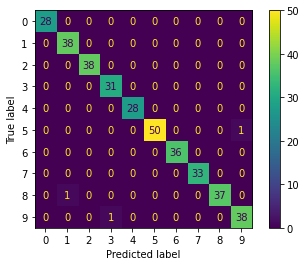

In [169]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)

In [170]:
import pickle

In [171]:
with open("model.pkl", "wb") as fio:
  pickle.dump(model, fio)

In [172]:
with open("model.pkl", "rb") as fio:
  mymodel = pickle.load(fio)

In [173]:
# Test that the loaded model is still capabe to predict accurately
mymodel.predict(X_test[:10]) == y_test[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [174]:
im = Image.open("22.jpg").resize((8,8))

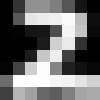

In [175]:
im.resize((100,100), resample=Image.NEAREST)

In [176]:
np_im = np.array(im)

In [120]:
#convert from (8,8,3)to (8,8)
#im = np.zeros((8,8,3))
#np_im = im[:,:,0]
#print(np_im.shape)

(8, 8)


In [177]:
np_im.shape

(8, 8)

In [178]:
# We need to transform this image to the same format as the images in the test and train datasets
preprocessed_img = np_im.astype(np.float32) / 255 * 16

In [179]:
# We also need to flatten it as we did with the training data and expand the "batch" dimension so that we get a list of one image
preprocessed_img.flatten()[None].shape

(1, 64)

In [180]:
model.predict(preprocessed_img.flatten()[None])

array([2])

In [117]:
np.where(y_test == 2)

(array([  5,  13,  14,  27,  35,  65,  66,  88,  95, 104, 119, 120, 124,
        140, 146, 158, 164, 166, 171, 172, 201, 228, 230, 234, 238, 247,
        250, 251, 254, 257, 283, 288, 295, 318]),)

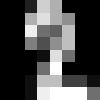

In [115]:
Image.fromarray((X_test[13].reshape((8,8)) / 16 * 255).astype(np.uint8), "L").resize((100,100), resample=Image.NEAREST)